# EDA / EL BUENO

Take a look @ our data:

In [9]:
patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=re.findall(patron, x)[0]
    except:
        n_ba=0
        
    return n_ba



def limpieza_cats(x):
    
    return str(x).replace('[', '').replace(']', '').replace("'", '').split(',')
def limpieza_dataset(df):
    
    df_numeric=df._get_numeric_data().drop(columns=['host_id', 'bathrooms', 'calendar_updated',
                                       'review_scores_rating', 'review_scores_cleanliness', 
                                       'review_scores_checkin', 'review_scores_location', 
                                       'calculated_host_listings_count', 
                                       'calculated_host_listings_count_entire_homes', 
                                       'calculated_host_listings_count_private_rooms', 
                                       'calculated_host_listings_count_shared_rooms',
                                       'reviews_per_month',])
    
    n_df=df_numeric.copy()

    n_df['bathroom']=df.bathrooms_text.apply(limpieza_ba)
    
    n_df['cats']=df.host_verifications

    #n_df=n_df.dropna() # cuidado, esto con el test no, porque no se pueden quitar filas
    
    n_df.cats=n_df.cats.apply(limpieza_cats)
    
    n_df.cats=n_df.cats.apply(lambda x: x[0])
    
    n_df=n_df.reset_index(drop=True)
    
    n_df=pd.concat([n_df, pd.get_dummies(n_df.cats).reset_index(drop=True)], axis=1)
    
    n_df=n_df.drop('cats', axis=1)
    
    return n_df

In [10]:
dummies_room_type = pd.get_dummies(raw_train['room_type'])

In [11]:
raw_train = pd.concat([raw_train,dummies_room_type], axis=1)
raw_train = raw_train.drop('property_type',axis=1)

In [100]:
 raw_test['bathroom']=raw_test['bathrooms_text'].apply(limpieza_ba)

In [13]:
#raw_train = pd.get_dummies(raw_train['property_type'])

In [14]:
#raw_train.host_is_superhost.unique() #Vamos a categorizar esto por 0 y 1

In [15]:
raw_train.isna().sum()

id                             0
host_total_listings_count      0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bathrooms_text                 8
bedrooms                     253
beds                         174
price                          0
Entire home/apt                0
Hotel room                     0
Private room                   0
Shared room                    0
bathroom                       0
dtype: int64

In [16]:
raw_train.fillna(0)
raw_train.drop(['bathrooms_text','id'], axis=1)

host_total_listings_count   latitude  longitude        room_type  \
0                            13  52.395080   4.991860     Private room   
1                             0  52.363710   4.907450  Entire home/apt   
2                            20  52.354820   4.853290       Hotel room   
3                             1  52.364460   4.859720  Entire home/apt   
4                             1  52.341760   4.847820     Private room   
5                             2  52.368930   4.897290     Private room   
6                             1  52.350760   4.889560  Entire home/apt   
7                             1  52.355930   4.898570     Private room   
8                             2  52.356090   4.908720  Entire home/apt   
9                             8  52.385860   4.876440     Private room   
10                            1  52.368320   4.930390  Entire home/apt   
11                            0  52.375020   4.896590  Entire home/apt   
12                            1  52.365080   4.924420  Entire home/apt   
13                            2  52.382360   4.868990  Entire home/apt   
14                            3  52.332880   4.872650     Private room   
15                            1  52.360730   4.980050  Entire home/apt   
16                            1  52.381620   4.882380  Entire home/apt   
17                            1  52.401730   4.902380     Private room   
18                            1  52.354810   4.887440  Entire home/apt   
19                            1  52.349660   4.849490     Private room   
20                            1  52.355360   4.891920  Entire home/apt   
21                           35  52.398560   4.905560  Entire home/apt   
22                            1  52.368970   4.855610  Entire home/apt   
23                            1  52.342000   4.805470  Entire home/apt   
24                            2  52.391060   4.937260  Entire home/apt   
25                            1  52.354490   4.891900  Entire home/apt   
26                            1  52.345460   4.867380     Private room   
27                            1  52.353790   4.995600     Private room   
28                           13  52.354730   5.004920     Private room   
29                            1  52.348210   4.904060  Entire home/apt   
30                            0  52.351010   4.896130  Entire home/apt   
31                            0  52.381170   4.880520  Entire home/apt   
32                            2  52.382520   4.854430     Private room   
33                            1  52.356780   4.905600  Entire home/apt   
34                            1  52.371970   4.873080  Entire home/apt   
35                            1  52.380670   4.850320  Entire home/apt   
36                            2  52.381070   4.886290     Private room   
37                            1  52.351290   4.851180  Entire home/apt   
38                            0  52.361120   4.896320  Entire home/apt   
39                            0  52.380010   4.873220  Entire home/apt   
40                            4  52.365570   4.887760     Private room   
41                            1  52.347200   4.858360  Entire home/apt   
42                            1  52.325390   4.946570     Private room   
43                            1  52.371720   4.875080  Entire home/apt   
44                            1  52.376910   4.877000  Entire home/apt   
45                            2  52.379140   4.884910  Entire home/apt   
46                            9  52.364300   4.888670  Entire home/apt   
47                            1  52.376280   4.939290  Entire home/apt   
48                            0  52.388100   4.914380     Private room   
49                            1  52.360990   4.859870  Entire home/apt   
50                            0  52.334740   4.848420     Private room   
51                            1  52.368060   4.860940     Private room   
52                            1  52.367440   4.866540     Private room   
53        

In [17]:
raw_train.fillna(0)


id  host_total_listings_count   latitude  longitude        room_type  \
0        0                         13  52.395080   4.991860     Private room   
1        1                          0  52.363710   4.907450  Entire home/apt   
2        2                         20  52.354820   4.853290       Hotel room   
3        3                          1  52.364460   4.859720  Entire home/apt   
4        4                          1  52.341760   4.847820     Private room   
5        5                          2  52.368930   4.897290     Private room   
6        6                          1  52.350760   4.889560  Entire home/apt   
7        7                          1  52.355930   4.898570     Private room   
8        8                          2  52.356090   4.908720  Entire home/apt   
9        9                          8  52.385860   4.876440     Private room   
10      10                          1  52.368320   4.930390  Entire home/apt   
11      11                          0  52.375020   4.896590  Entire home/apt   
12      12                          1  52.365080   4.924420  Entire home/apt   
13      13                          2  52.382360   4.868990  Entire home/apt   
14      14                          3  52.332880   4.872650     Private room   
15      15                          1  52.360730   4.980050  Entire home/apt   
16      16                          1  52.381620   4.882380  Entire home/apt   
17      17                          1  52.401730   4.902380     Private room   
18      18                          1  52.354810   4.887440  Entire home/apt   
19      19                          1  52.349660   4.849490     Private room   
20      20                          1  52.355360   4.891920  Entire home/apt   
21      21                         35  52.398560   4.905560  Entire home/apt   
22      22                          1  52.368970   4.855610  Entire home/apt   
23      23                          1  52.342000   4.805470  Entire home/apt   
24      24                          2  52.391060   4.937260  Entire home/apt   
25      25                          1  52.354490   4.891900  Entire home/apt   
26      26                          1  52.345460   4.867380     Private room   
27      27                          1  52.353790   4.995600     Private room   
28      28                         13  52.354730   5.004920     Private room   
29      29                          1  52.348210   4.904060  Entire home/apt   
30      30                          0  52.351010   4.896130  Entire home/apt   
31      31                          0  52.381170   4.880520  Entire home/apt   
32      32                          2  52.382520   4.854430     Private room   
33      33                          1  52.356780   4.905600  Entire home/apt   
34      34                          1  52.371970   4.873080  Entire home/apt   
35      35                          1  52.380670   4.850320  Entire home/apt   
36      36                          2  52.381070   4.886290     Private room   
37      37                          1  52.351290   4.851180  Entire home/apt   
38      38                          0  52.361120   4.896320  Entire home/apt   
39      39                          0  52.380010   4.873220  Entire home/apt   
40      40                          4  52.365570   4.887760     Private room   
41      41                          1  52.347200   4.858360  Entire home/apt   
42      42                          1  52.325390   4.946570     Private room   
43      43                          1  52.371720   4.875080  Entire home/apt   
44      44                          1  52.376910   4.877000  Entire home/apt   
45      45                          2  52.379140   4.884910  Entire home/apt   
46      46                          9  52.364300   4.888670  Entire home/apt   
47      47                          1  52.376280   4.939290  Entire home/apt   
48      48                          0  52.388100   4.914380     Private room   
49      

In [18]:
#PARON

Cargados los datasets, vamos a echar un ojo a lo que tenemos en el train:

In [19]:
#Hacemos el tts

In [20]:
from sklearn.model_selection import train_test_split as tts

In [21]:
import h2o
from h2o.automl import H2OAutoML

In [22]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         51 mins 57 secs
H2O_cluster_timezone:       Europe/Madrid
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_vp_63f77d
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    11.91 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.7 final
--------------------------  -----------------------------

In [23]:
data=raw_train.sample(frac=0.95, random_state=42).reset_index(drop=True)

data_test=raw_train.drop(data.index).reset_index(drop=True)

data.shape, data_test.shape

((3959, 15), (208, 15))

In [24]:
#raw_train.head()

In [25]:
train = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
x = train.columns
y = "price"
x.remove(y)

In [27]:
aml = H2OAutoML(max_models=30, seed=15)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_6_AutoML_5_20220222_131223

No model summary for this model

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 13368.264588462815
RMSE: 115.62121167183301
MAE: 44.99514120255615
RMSLE: 0.34929047058979246
Mean Residual Deviance: 13368.264588462815

ModelMetricsRegression: stackedensemble
** Reported on cross-validation data. **

MSE: 18990.65938133803
RMSE: 137.8066013706819
MAE: 55.01548841620491
RMSLE: 0.434179506835852
Mean Residual Deviance: 18990.65938133803


In [28]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)[:5]

model_id mean_residual_deviance rmse mse mae 
 
 
 StackedEnsemble_BestOfFamily_6_AutoML_5_20220222_131223 18990.7 137.807 18990.7 55.0155 
 StackedEnsemble_AllModels_5_AutoML_5_20220222_131223 19393.5 139.26 19393.5 56.8847 
 GBM_grid_1_AutoML_5_20220222_131223_model_4 24317.5 155.941 24317.5 58.7861 
 GBM_grid_1_AutoML_5_20220222_131223_model_3 25310.2 159.092 25310.2 60.1723 
 GBM_3_AutoML_5_20220222_131223 25408.7 159.401 25408.7 57.5067 
 StackedEnsemble_BestOfFamily_5_AutoML_5_20220222_131223 25551.5 159.848 25551.5 60.3077 
 StackedEnsemble_BestOfFamily_3_AutoML_5_20220222_131223 25650.6 160.158 25650.6 58.2752 
 GBM_grid_1_AutoML_5_20220222_131223_model_5 25652 160.162 25652 57.1201 
 StackedEnsemble_BestOfFamily_8_AutoML_5_20220222_131223 25729.6 160.404 25729.6 57.1582 
 GBM_2_AutoML_5_20220222_131223 26068.2 161.457 26068.2 57.9658

In [29]:
data_test=raw_train.drop(data.index).reset_index(drop=True)
data_test=h2o.H2OFrame(data_test)
preds = aml.leader.predict(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [30]:
test_completo = pd.read_csv('data/test.csv.zip')

In [31]:
test_completo = h2o.H2OFrame(test_completo)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
prediccion_test_completo = aml.leader.predict(test_completo)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset is missing column 'Entire home/apt': substituting in a column of NaN
  warnings.warn(w)
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset is missing column 'Hotel room': substituting in a column of NaN
  warnings.warn(w)
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset is missing column 'Private room': substituting in a column of NaN
  warnings.warn(w)
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset is missing column 'Shared room': substituting in a column of NaN
  warnings.warn(w)
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset is missing column 'bathroom': substituting in a column of NaN
  warnings.warn(w)


In [33]:
prediccion_test_completo.shape

(1389, 1)

In [34]:
prediccion_test_completo.head()

predict 
 
 
 100.585 
 128.614 
 163.832 
 175.134 
 154.181 
 288.735 
 222.62 
 148.821 
 145.512 
 124.272

In [35]:
type(prediccion_test_completo)

h2o.frame.H2OFrame

In [36]:
test_pandas = h2o.as_list(prediccion_test_completo)
type(test_pandas)

pandas.core.frame.DataFrame

In [37]:
test_pandas.head()

predict
0  100.584999
1  128.614059
2  163.831726
3  175.134430
4  154.180771

### METER AQUI PARA QUE CAMBIE NOMBRE DEL ARCHIVO EN FUNCION DE DIA Y HORA

In [41]:
#from datetime import datetime, date

In [43]:
#today=date.today()
#now = datetime.now()
#
#current_time = now.strftime("%H:%M:%S")
#dt_string = now.strftime("%d-%m/__%H--%M")

In [50]:
test_pandas.to_csv("data/predicciones_3.csv")

In [53]:
PARON AQUI

SyntaxError: invalid syntax (3125014133.py, line 1)

### CARGAMOS RESULTADOS EN SAMPLE

In [57]:
sample = pd.read_csv('data/sample.csv')
sample.price = test_pandas.predict  #Cambiamos columna price por la Series de Pandas que tenemos
sample.to_csv('data/modelo3_predict.csv', index = False)

In [62]:
#sample.head()

price  id
0  100.584999   0
1  128.614059   1
2  163.831726   2
3  175.134430   3
4  154.180771   4

### PYCARET

In [63]:
from pycaret.regression import *
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
raw_test = pd.read_csv('data/test.csv.zip')

In [ ]:
raw_train.shape, raw_test.shape

### Limpieza del train

In [95]:
raw_test.drop(columns=['listing_url','scrape_id','last_scraped','amenities',
              'name','description','neighborhood_overview','picture_url','host_id','host_url','host_name',
              'host_since','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate',
              'host_thumbnail_url','host_picture_url','host_neighbourhood','neighbourhood_cleansed',
              'neighbourhood_group_cleansed','bathrooms','minimum_nights','maximum_nights',
              'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
              'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability',
              'availability_30','availability_60','availability_90','availability_365','calendar_last_scraped',
              'number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review',
              'last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
              'license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
              'reviews_per_month','host_has_profile_pic','neighbourhood','host_listings_count','host_is_superhost',
            'host_verifications','host_identity_verified'], axis=1, inplace=True)

In [96]:
dummies_room_type = pd.get_dummies(raw_test['room_type'])

In [97]:
raw_test = pd.concat([raw_test,dummies_room_type], axis=1)

In [98]:
raw_test.fillna(0)

id  host_total_listings_count  latitude  longitude  \
0        0                          1  52.35713    4.92470   
1        1                          0  52.38810    4.91438   
2        2                          1  52.37370    4.86340   
3        3                          2  52.36181    4.88783   
4        4                          0  52.34766    4.85982   
...    ...                        ...       ...        ...   
1384  1384                          1  52.39779    4.90768   
1385  1385                          1  52.36379    4.94369   
1386  1386                          1  52.37094    4.86425   
1387  1387                          1  52.38140    4.85557   
1388  1388                          1  52.36005    4.98335   

                    property_type        room_type  accommodates  \
0     Private room in rental unit     Private room             1   
1           Shared room in hostel      Shared room             2   
2              Entire rental unit  Entire home/apt             2   
3     Private room in rental unit     Private room             2   
4              Entire rental unit  Entire home/apt             2   
...                           ...              ...           ...   
1384  Private room in guest suite     Private room             2   
1385           Entire rental unit  Entire home/apt             3   
1386             Entire townhouse  Entire home/apt             4   
1387      Entire residential home  Entire home/apt             2   
1388    Private room in townhouse     Private room             4   

        bathrooms_text  bedrooms  beds  Entire home/apt  Hotel room  \
0        1 shared bath       1.0   1.0                0           0   
1        1 shared bath       1.0   1.0                0           0   
2               1 bath       1.0   1.0                1           0   
3       1 private bath       1.0   2.0                0           0   
4            1.5 baths       1.0   1.0                1           0   
...                ...       ...   ...              ...         ...   
1384  1.5 shared baths       1.0   2.0                0           0   
1385            1 bath       2.0   2.0                1           0   
1386            1 bath       2.0   2.0                1           0   
1387            1 bath       1.0   1.0                1           0   
1388         1.5 baths       0.0   2.0                0           0   

      Private room  Shared room  
0                1            0  
1                0            1  
2                0            0  
3                1            0  
4                0            0  
...            ...          ...  
1384             1            0  
1385             0            0  
1386             0            0  
1387             0            0  
1388             1            0  

[1389 rows x 14 columns]

In [ ]:
data=raw_train.sample(frac=0.95, random_state=786).reset_index(drop=True)

data_test=raw_train.drop(data.index).reset_index(drop=True)


In [ ]:
raw_train.shape, raw_test.shape

In [ ]:

price=setup(data=data, target='price', session_id=123)


In [ ]:
compare_models()

In [ ]:
### LIMPIEZA AUTOMÁTICA DEL DATAFRAME:

In [ ]:
df = pd.read_csv('data/train.csv.zip')

In [ ]:
limpieza_dataset(df).shape

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split as tts
X=df.drop('price', axis=1)
y=df.price
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.15, random_state=42)
# modelo

from sklearn.ensemble import RandomForestRegressor as RFR
modelo=RFR()

modelo.fit(X_train, y_train)

### PYCARET REGRESSOR

In [68]:
from pycaret.regression import * #importamos el regresor de Pycaret

In [67]:
raw_train.shape #Aquí ya lo tenemos limpio

(4167, 15)

### TTS

In [69]:
data = raw_train.sample(frac=0.9, random_state=42)
data_unseen = raw_train.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [70]:
s = setup(data = data, target = 'price', session_id=123)

In [73]:
best = compare_models(sort = 'RMSE', fold=15)

### AFINAMOS EL MODELO CREADO

In [79]:
ridge_tuned = tune_model(best,optimize = 'RMSE', fold = 20)

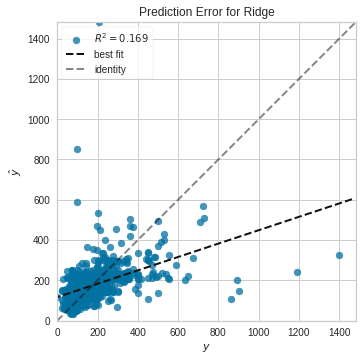

In [80]:
plot_model(ridge_tuned, plot = 'error')

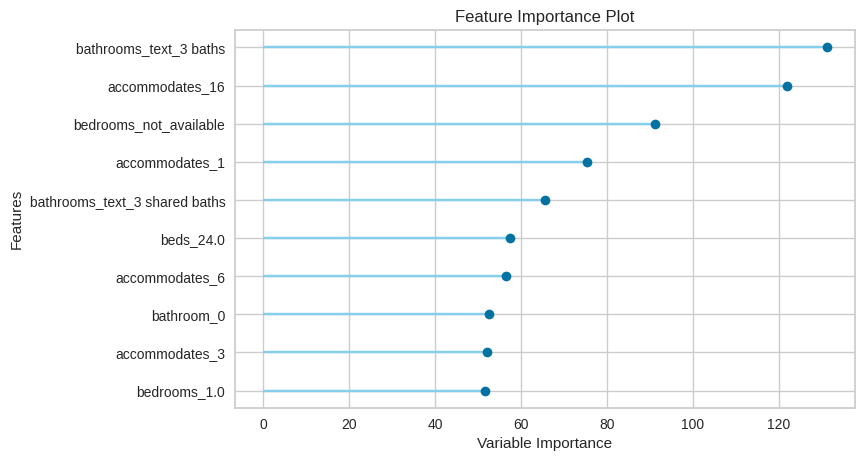

In [88]:
plot_model(ridge_tuned, plot='feature')

### FINALIZAMOS EL MODELO

In [90]:
final_model = finalize_model(ridge_tuned)
print(final_model)

/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86808e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21602e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18446e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24435e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/vp/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/linear_model/_ridg

Ridge(alpha=5.39, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


In [94]:
#raw_test = pd.read_csv('data/test.csv.zip')

In [101]:
new_prediction = predict_model(ridge_tuned, data=raw_test)
new_prediction.head()

id  host_total_listings_count  latitude  longitude  \
0   0                          1  52.35713    4.92470   
1   1                          0  52.38810    4.91438   
2   2                          1  52.37370    4.86340   
3   3                          2  52.36181    4.88783   
4   4                          0  52.34766    4.85982   

                 property_type        room_type  accommodates  bathrooms_text  \
0  Private room in rental unit     Private room             1   1 shared bath   
1        Shared room in hostel      Shared room             2   1 shared bath   
2           Entire rental unit  Entire home/apt             2          1 bath   
3  Private room in rental unit     Private room             2  1 private bath   
4           Entire rental unit  Entire home/apt             2       1.5 baths   

   bedrooms  beds  Entire home/apt  Hotel room  Private room  Shared room  \
0       1.0   1.0                0           0             1            0   
1       1.0   1.0                0           0             0            1   
2       1.0   1.0                1           0             0            0   
3       1.0   2.0                0           0             1            0   
4       1.0   1.0                1           0             0            0   

  bathroom       Label  
0        1   43.147758  
1        1   63.012383  
2        1  142.989517  
3        1  117.419838  
4        1  136.226608

In [102]:
predictions4 = new_prediction.Label

AttributeError: 'Series' object has no attribute 'columns'

In [110]:
sample = pd.read_csv('data/sample.csv')
sample.price = new_prediction['Label']  #Cambiamos columna price por la Series de Pandas que tenemos
sample.to_csv('data/modelo4_predict.csv', index = False)